<a href="https://colab.research.google.com/github/kyurt/macd/blob/master/GLD_buy_sell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses the Moving Average Convergence/Divergence (MACD)
#             crossover to determine when to buy and sell a stock.

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [73]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving GLD.csv to GLD.csv


In [ ]:
#Store the date into a df
df = pd.read_csv('BTC-USD.csv')
#Set the date to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-09-29,2019-09-29,8246.037109,8261.707031,7990.497070,8104.185547,8104.185547,1.303463e+10
2019-09-30,2019-09-30,8104.226563,8314.231445,7830.758789,8293.868164,8293.868164,1.711547e+10
2019-10-01,2019-10-01,8299.720703,8497.692383,8232.679688,8343.276367,8343.276367,1.530534e+10
2019-10-02,2019-10-02,8344.212891,8393.041992,8227.695313,8393.041992,8393.041992,1.312571e+10
2019-10-03,2019-10-03,8390.774414,8414.227539,8146.437012,8259.992188,8259.992188,1.366882e+10
...,...,...,...,...,...,...,...
2020-09-25,2020-09-25,10747.472656,10757.548828,10594.047852,10702.290039,10702.290039,2.123255e+10
2020-09-26,2020-09-26,10702.237305,10778.500000,10682.082031,10754.437500,10754.437500,1.810501e+10
2020-09-27,2020-09-27,10752.939453,10804.732422,10643.458008,10774.426758,10774.426758,1.801688e+10
2020-09-28,2020-09-28,NaN,NaN,NaN,NaN,NaN,NaN


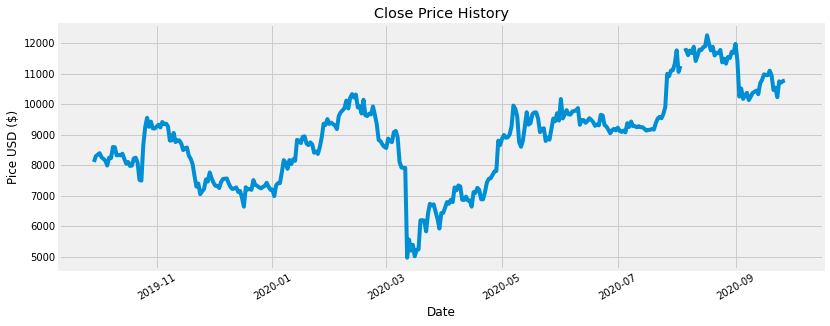

In [ ]:
#Visally show the price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=30)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Pice USD ($)')
plt.show()


In [ ]:
#Calculate the MAC and signal line indicators
#Calculate the short term exponential moving average (EMA)
shortEMA = df.Close.ewm(span=15, adjust=False).mean()
#Calculate the long term exponential moving average (EMA)
LongEMA  = df.Close.ewm(span=32, adjust=False).mean()
#Calculate the MACD line
MACD = shortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()


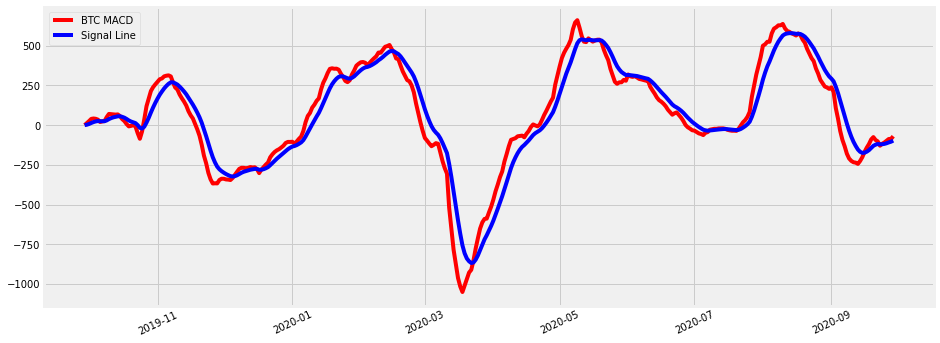

In [ ]:
#plot the chart
plt.figure(figsize=(14.2, 5.5))
plt.plot(df.index, MACD, label = 'BTC MACD', color = 'red')
plt.plot(df.index, signal, label ='Signal Line', color = 'blue')
plt.xticks(rotation=25)
plt.legend(loc='upper left')
plt.show()

# New Section

# New Section

In [ ]:
#create new columns for the data
df['MACD'] = MACD
df['Signal Line'] = signal
#show
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2019-09-29,2019-09-29,8246.037109,8261.707031,7990.497070,8104.185547,8104.185547,1.303463e+10,0.000000,0.000000
2019-09-30,2019-09-30,8104.226563,8314.231445,7830.758789,8293.868164,8293.868164,1.711547e+10,15.131377,3.026275
2019-10-01,2019-10-01,8299.720703,8497.692383,8232.679688,8343.276367,8343.276367,1.530534e+10,30.755402,8.572101
2019-10-02,2019-10-02,8344.212891,8393.041992,8227.695313,8393.041992,8393.041992,1.312571e+10,46.615866,16.180854
2019-10-03,2019-10-03,8390.774414,8414.227539,8146.437012,8259.992188,8259.992188,1.366882e+10,47.897261,22.524135
...,...,...,...,...,...,...,...,...,...
2020-09-25,2020-09-25,10747.472656,10757.548828,10594.047852,10702.290039,10702.290039,2.123255e+10,-96.916676,-115.409788
2020-09-26,2020-09-26,10702.237305,10778.500000,10682.082031,10754.437500,10754.437500,1.810501e+10,-83.010263,-108.929883
2020-09-27,2020-09-27,10752.939453,10804.732422,10643.458008,10774.426758,10774.426758,1.801688e+10,-69.574355,-101.058778
2020-09-28,2020-09-28,NaN,NaN,NaN,NaN,NaN,NaN,-69.574355,-94.761893


In [ ]:
#create a function to signal when to buy and sell an asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag =1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)

In [ ]:
#Create buy and sell column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [ ]:
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2019-09-29,2019-09-29,8246.037109,8261.707031,7990.497070,8104.185547,8104.185547,1.303463e+10,0.000000,0.000000,NaN,NaN
2019-09-30,2019-09-30,8104.226563,8314.231445,7830.758789,8293.868164,8293.868164,1.711547e+10,15.131377,3.026275,8293.868164,NaN
2019-10-01,2019-10-01,8299.720703,8497.692383,8232.679688,8343.276367,8343.276367,1.530534e+10,30.755402,8.572101,NaN,NaN
2019-10-02,2019-10-02,8344.212891,8393.041992,8227.695313,8393.041992,8393.041992,1.312571e+10,46.615866,16.180854,NaN,NaN
2019-10-03,2019-10-03,8390.774414,8414.227539,8146.437012,8259.992188,8259.992188,1.366882e+10,47.897261,22.524135,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,2020-09-25,10747.472656,10757.548828,10594.047852,10702.290039,10702.290039,2.123255e+10,-96.916676,-115.409788,NaN,NaN
2020-09-26,2020-09-26,10702.237305,10778.500000,10682.082031,10754.437500,10754.437500,1.810501e+10,-83.010263,-108.929883,NaN,NaN
2020-09-27,2020-09-27,10752.939453,10804.732422,10643.458008,10774.426758,10774.426758,1.801688e+10,-69.574355,-101.058778,NaN,NaN
2020-09-28,2020-09-28,NaN,NaN,NaN,NaN,NaN,NaN,-69.574355,-94.761893,NaN,NaN


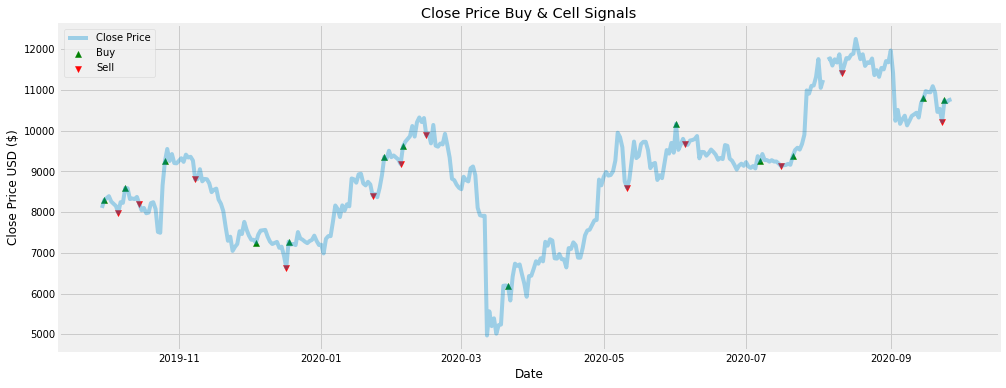

In [ ]:
#Visally show the buy sell signals
plt.figure(figsize=(15.0, 6.0))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha =1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha =1)
plt.plot(df['Close'], label='Close Price', alpha = 0.35)
plt.title('Close Price Buy & Cell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()